# Polynomial Regression and Step Functions (46)

While we did a lot of analysis on linear models $Y = \beta_{0}X_{0} + ... + \beta_{p}X_{p}$, **the truth is almost never linear**.

When it's not:

* **polynomials,**
* splines,
* local regression, and
* generalized additive models

### Polynomials 

* $$ y_{i} = \beta_{0} + \beta_{1}x_{i} + \beta_{2}x_{i}^2 + ... + \beta_{d}x_{i}^d +  \epsilon_{i} $$
    * Create new variables $X_{1} = X, X_{2} = X^2$, etc. and then treat as multiple linear regression.
    * $$ \hat{f}(x_{0}) = \beta_{0} + \beta_{1}x_{0} + ... + \hat{\beta}_{4}x_{0}^4$$
    * Not really interested in coef; more interested in the fitted function values at anay  value x.
    * since $\hat{f} (x_{0})$ is a lin. function of the $\hat{\beta}_{l}$, we can get a simple expression for the **pointwise-variances** $\text{Var}[\hat{f}(x_{0})]$ at any value $x_{0}$.
    * Furthermore, we select d with CV
    * Log reg follows naturally. e.g.:
    * $$\Pr(y_{i} > 250 | x_{i}) = \dfrac {exp(\beta_{0} + \beta_{1}x_{i} + ... + \beta_{d}x_{i}^d}{1 + exp(\beta_{0} + \beta_{1}x_{i} + ... + \beta_{d}x_{i}^d} $$
    * To get confidence intervals, compute upper and lower bounds on **the logit scale** and then invert to get on probability scale
    * See GAMs later
    * Can fit using `y ~ poly(x, degree = 3) ` in formula.
* **step functions,**
    * The idea is to cut the variable into distinct regions
    * $$ C_{1}(X) = I(X < 35), C_{2}(X) = I(35 \le X < 50), ..., C_{3}(X) = I(X \ge 65) $$
    * Easy to work with and creates a series of dumy variables representing each group.
    * In R: `I(year < 2005)` or  `cut(age, c(18, 25, 40, 65, 90))`.

offer lots of flexibility, without losing the ease and interpretability of linear models.

# Piecewise Polynomials and Splines (47)

$$ y_{i} = \begin{cases} \beta_{01} + \beta_{11}x_{i} + \beta_{21}x_{i}^2 + \epsilon_{i} \text{ if } x_{i} < c; \\
\beta_{02} + \beta_{12}x_{i} + \beta_{22}x_{i}^2 + \epsilon_{i} \text{ if } x_{i} \ge c;
\end{cases} $$

Better to add contraints to polynomials for continuity. If you make enough derivatives of cubit functions the same, you get a smooth line of a **spline**.

* You can only fit degree of n - 1 on degree n polynomial functions.

### Linear Splines

A linear spline with knots at $\xi_{k}, k = 1, ..., K$ is a piecewise linear polynomial continuous at each knot. Looks like:

$$y_{i} = \beta_{0} + \beta_{1}b_{1}(x_{i}) + \beta_{2}b_{2}(x_{i}) + ... + \beta_{K+3}b_{K+3}(x_{i}) + \epsilon_{i} $$

where the $b_{k}$ are **basis functions**.

$$ b_{1}(x_{i}) = x_{i} $$

$$ b_{k+1}(x_{i}) = (x_{i} - \xi_{k})_{+}, k = 1, ..., K $$

Here the ()+ means positive part; i.e.

$$(x_{i} - \xi_{k})_{+} = \begin{cases} x_{i} - \xi_{k} \text{ if } x_{i} > \xi_{k} \\
0 \text{ otherwise} \end{cases} $$

Adding the spline will change the slope of the linear function.

### Cubic Spline

A linear spline with knots at $\xi_{k}, k = 1, ..., K$ is a piecewise cubic polynomial with continuous derivatives up to order 2 at each knot. Looks like:

$$y_{i} = \beta_{0} + \beta_{1}b_{1}(x_{i}) + \beta_{2}b_{2}(x_{i}) + ... + \beta_{K+3}b_{K+3}(x_{i}) + \epsilon_{i} $$

$$ b_{1}(x_{i}) = x_{i} $$

$$ b_{2}(x_{i}) = x_{i}^2 $$

$$ b_{k+3}(x_{i}) = (x_{i} - \xi_{k})_{+}^3, k = 1, ..., K $$

$$(x_{i} - \xi_{k})_{+}^3 = \begin{cases} (x_{i} - \xi_{k})^3 \text{ if } x_{i} > \xi_{k} \\
0 \text{ otherwise} \end{cases} $$

Function we use in R: `bs(x, ...)` for any degree splines, and `ns(x, ...)` for natural cubic splines, in package `splines`.

### Where to place Knots?

* One strategy is to decide K (# of knots), and then place them at appropriate quantiles of the observed X.
* A cubic spline with K knots has K + 4 parameters of degress of freedom.
* A natural spline with K knows has K degress of freedom.

# Smoothing Splines (48)

Very mathematical. This smooths function g(x) to some data:

$$ \min_{g \in S} \sum_{i = 1}^{n} (y_{i} - g(x_{i})) ^2 + \lambda \int g'' (t) ^ 2 dt $$

* The first term is RSS
* The second term contrains the functions in which we search to smooth
* g'' picks up squiggles, the ^2 computes areas, and integral adds up. Therefore the second computes **non linearity**.
    * It's called the **roughness penalty**, and lambda is the **tuning parameter**
    * The larger lambda is, the more linear it is.
    
The R function to use is: `smooth.spline()`.

* The vector of n fitted values can be written as $\hat{g}_{\lambda} = S_{\lambda}y$ where $S_{\lambda}$ is a n x n matrix
* The **effective degrees of freedom** are given by:

* $$ df_{\lambda} = \sum_{i=1}^{n} \{ S_{y} \}_{ii} $$

* We can specify $df$ rather than $\lambda$ !
    * In R: `smooth.spline(age, wage, df = 10)`
* The LOOCV error is:

* $$ \text{RSS}_{cv}(\lambda) = \sum_{i = 1}^{n}(y_{i} - \hat{g}_{\lambda}^{(-i)}(x_{i})) ^ 2 = \sum_{i = 1}^{n} \big[ \dfrac {y_{i} - \hat{g}_{\lambda}(x_{i})}{1 - \{ S_{\lambda} \}_{ii}} \big] ^ 2 $$

    * In R: `smooth.spline(age, wage)`


# Local Regression and Generalized Additive Models (49)

With a sliding weight function, we fit separate linear fits over the range of X by weighted least squares.

* Function in R: `loess()`.
* We like using this because it, unlike splines / multinomial regression, the ends of the data are smoother.

$$ y_{i} = \beta_{0} + f_{1}(x_{i1}) + f_{2}(x_{i2}) + ... + f_{p}(x_{ip}) + \epsilon_{i} $$

We can fit a GAM (generalized additive model) using natural splines:

### Generalized Additive Models

```r 
lm(wage ~ ns(year, df = 5) + ns(age, df = 5) + eduction)
```

* Coefficients not that interesting, fitted functions are and are plotted through `plot.gam`.
* Can mix terms, use `anova()` to compare models.

```r
gam(wage ~ s(year, df = 5) + lo(age, span = .5) + education)
```

* `lo` is loess.
* Can fit bivariate smootherds like: `ns(age, df = 5): ns(year, df = 5)`

### GAMs for classification

$$ log \big( \dfrac{p(X)}{1-p(X)}\big) = \beta_{0} + f_{1}(X_1) + f_2(X_2) + ... + f_p(X_p) $$

```r
gam(I(wage > 250) ~ year + s(age, df = 5) + education, family = binomial)
```

# R-Lab, Polynomials (50)

In [1]:
require(ISLR)
attach(Wage)

Loading required package: ISLR


### Polynomials

First we will use polynomials and focus on a single predictor age

In [2]:
fit = lm(wage ~ poly(age, 4), data = Wage)
summary(fit)


Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


The `poly()` funcion generates a basis of **orthogonal polynomials**

Lets make a plot of the fitted function, along with the SE of the fit.

In [5]:
agelims = range(age)
age.grid = seq(from = agelims[1], to = agelims[2])
age.grid

[1] 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
[26] 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
[51] 68 69 70 71 72 73 74 75 76 77 78 79 80

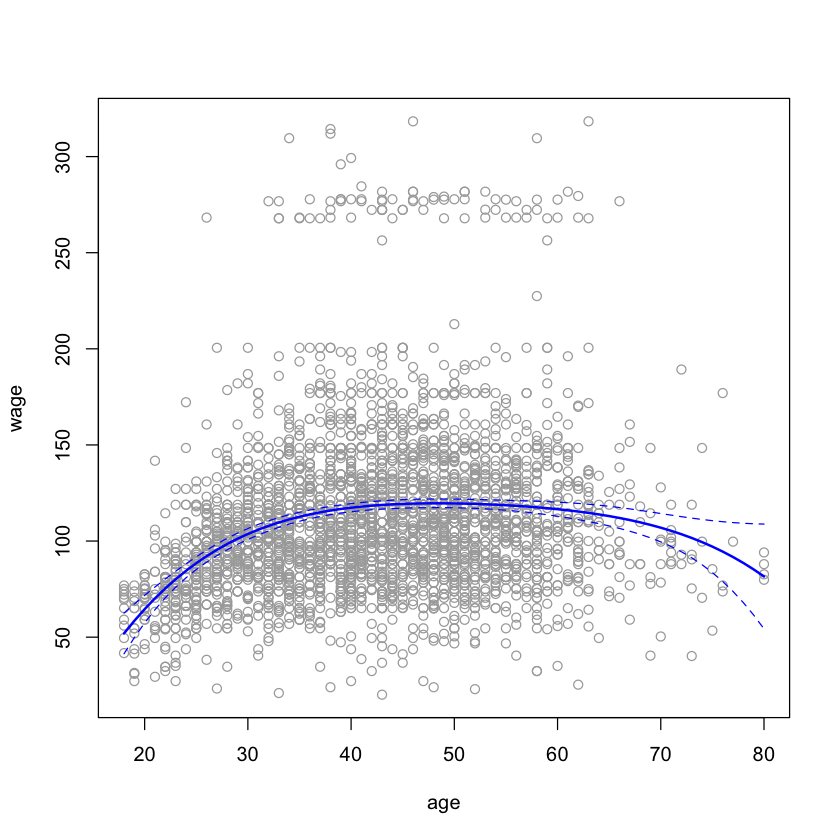

In [8]:
preds = predict(fit, newdata = list(age = age.grid), se = TRUE)
# we want SEs!

se.bands = cbind(preds$fit + 2*preds$se, preds$fit - 2*preds$se)
# SE bands based on +/- 2 SEs

plot(age, wage, col = "darkgrey")
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, col = "blue", lty = 2)
#lty = line type as broken
#note there is a small band of high wage earners

There are other more direct ways of doing this in R, e.g.

In [9]:
fita = lm(wage ~ age + I(age ^ 2) + I(age ^ 3) + I(age ^ 4), data = Wage)
summary(fita)
#I() protects the variable


Call:
lm(formula = wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.842e+02  6.004e+01  -3.067 0.002180 ** 
age          2.125e+01  5.887e+00   3.609 0.000312 ***
I(age^2)    -5.639e-01  2.061e-01  -2.736 0.006261 ** 
I(age^3)     6.811e-03  3.066e-03   2.221 0.026398 *  
I(age^4)    -3.204e-05  1.641e-05  -1.952 0.051039 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


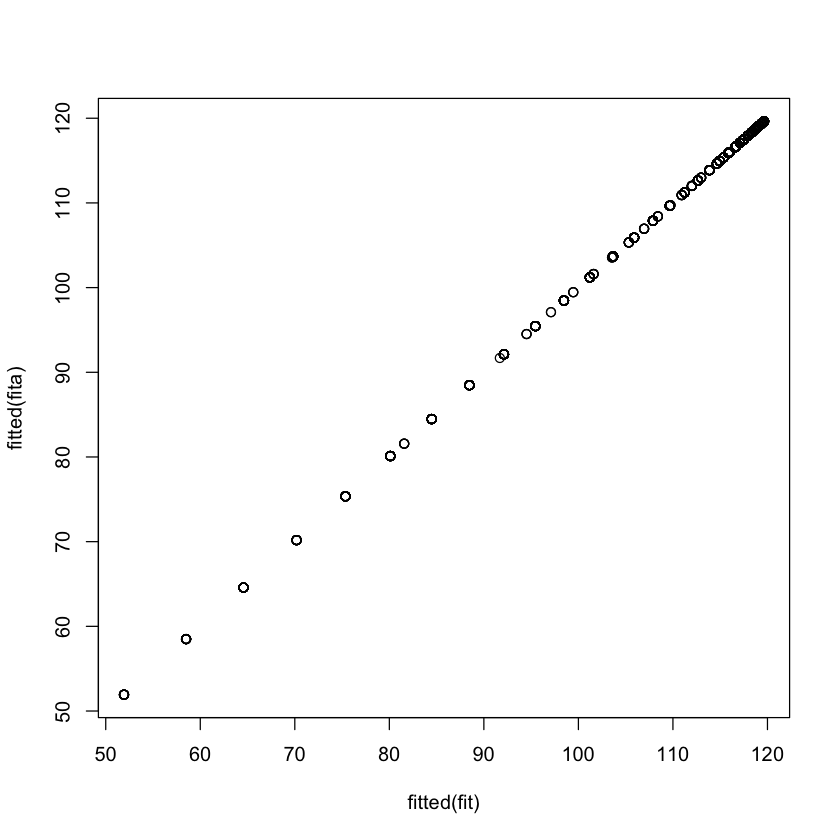

In [10]:
plot(fitted(fit), fitted(fita))

In [11]:
fita = lm(wage~education, data = Wage)
fitb = lm(wage~education + age, data = Wage)
fitc = lm(wage~education + poly(age, 2), data = Wage)
fitd = lm(wage~education + poly(age, 3), data = Wage)
anova(fita, fitb, fitc, fitd)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,2995,3995721,NA,NA,NA,NA
2,2994,3867992,1,127728.9,102.7378,9.215004e-24
3,2993,3725395,1,142597.1,114.6969,2.728971e-26
4,2992,3719809,1,5586.66,4.493588,0.03410431


We see that models 2 and 3 are significant while 4 is not

In [12]:
# fit data whether people make > 250

fit = glm(I(wage > 250) ~ poly(age, 3), data = Wage, family = binomial)
summary(fit)


Call:
glm(formula = I(wage > 250) ~ poly(age, 3), family = binomial, 
    data = Wage)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2808  -0.2736  -0.2487  -0.1758   3.2868  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.8486     0.1597 -24.100  < 2e-16 ***
poly(age, 3)1  37.8846    11.4818   3.300 0.000968 ***
poly(age, 3)2 -29.5129    10.5626  -2.794 0.005205 ** 
poly(age, 3)3   9.7966     8.9990   1.089 0.276317    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 730.53  on 2999  degrees of freedom
Residual deviance: 707.92  on 2996  degrees of freedom
AIC: 715.92

Number of Fisher Scoring iterations: 8


In [13]:
preds = predict(fit, list(age = age.grid), se = T)
se.bands = preds$fit + cbind(fit = 0, 
                             lower = -2*preds$se, upper = 2*preds$se)
se.bands[1:5, ]

,fit,lower,upper
1,-7.664756,-10.759826,-4.569686
2,-7.324776,-10.106699,-4.542852
3,-7.001732,-9.492821,-4.510643
4,-6.695229,-8.917158,-4.473300
5,-6.404868,-8.378691,-4.431045


We have done the computations on the logit scale, to transform we need to apply the inse logit matting:

$$ p = \dfrac {e^\eta}{1 + e^\eta} $$

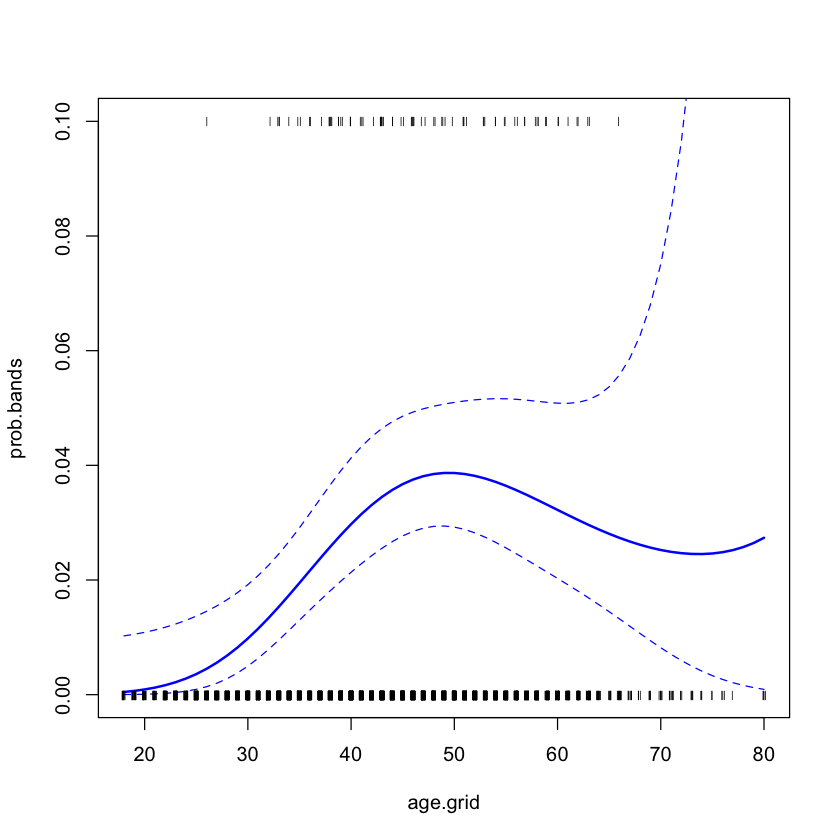

In [16]:
prob.bands = exp(se.bands)/ (1 + exp(se.bands))
matplot(age.grid, prob.bands, col = "blue", 
        lwd = c(2, 1, 1), lty = c(1, 2, 2), type = "l", ylim = c(0, .1))
points(jitter(age), I(wage > 250)/10, pch = "|", cex = .5)

# Splines and GAMs (51)

In [17]:
require(splines)

Loading required package: splines


Warning message:
In smooth.spline(age, wage, cv = TRUE): cross-validation with non-unique 'x' values seems doubtful

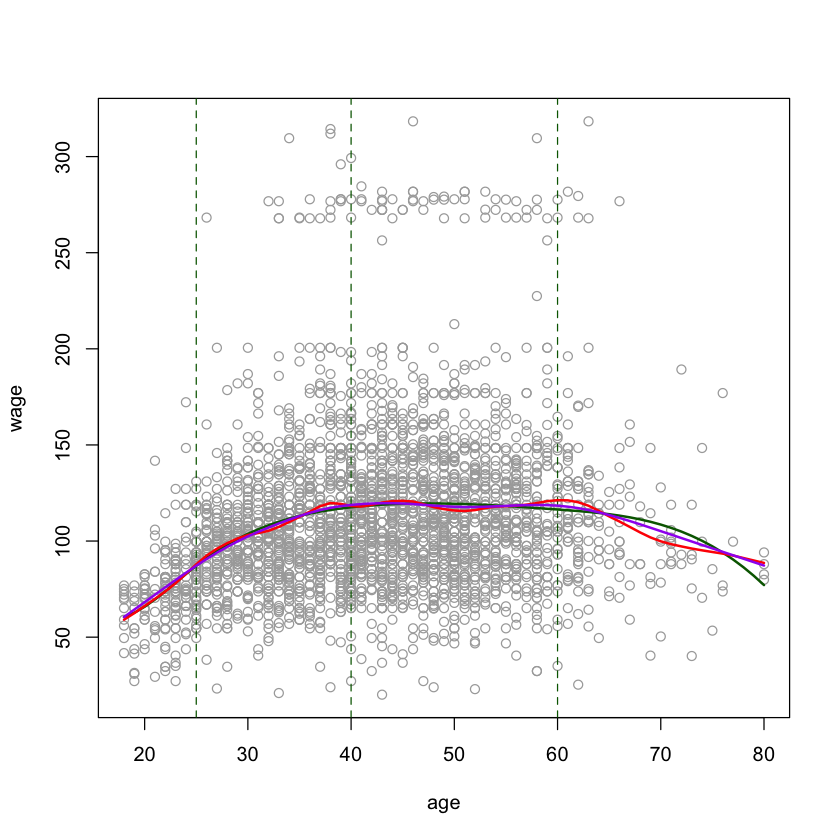

In [23]:
fit = lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
plot(age, wage, col = "darkgrey")
lines(age.grid, predict(fit, list(age = age.grid)), col = "darkgreen", lwd = 2)
abline(v = c(25, 40, 60), lty = 2, col = "darkgreen")

# What about smoothing splines
fit = smooth.spline(age, wage, df = 16)
lines(fit, col = "red", lwd = 2)

# What about LOOCV?

fit = smooth.spline(age, wage, cv = TRUE)
lines(fit, col = "purple", lwd = 2)

In [24]:
fit
# Note the EDF is 6.8

Call:
smooth.spline(x = age, y = wage, cv = TRUE)

Smoothing Parameter  spar= 0.6988943  lambda= 0.02792303 (12 iterations)
Equivalent Degrees of Freedom (Df): 6.794596
Penalized Criterion: 75215.9
PRESS: 1593.383

In [27]:
fit = lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
summary(fit)
# There are 6 parameters, i.e. 6 degrees of freedom


Call:
lm(formula = wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.832 -24.537  -5.049  15.209 203.207 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       60.494      9.460   6.394 1.86e-10 ***
bs(age, knots = c(25, 40, 60))1    3.980     12.538   0.317 0.750899    
bs(age, knots = c(25, 40, 60))2   44.631      9.626   4.636 3.70e-06 ***
bs(age, knots = c(25, 40, 60))3   62.839     10.755   5.843 5.69e-09 ***
bs(age, knots = c(25, 40, 60))4   55.991     10.706   5.230 1.81e-07 ***
bs(age, knots = c(25, 40, 60))5   50.688     14.402   3.520 0.000439 ***
bs(age, knots = c(25, 40, 60))6   16.606     19.126   0.868 0.385338    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.92 on 2993 degrees of freedom
Multiple R-squared:  0.08642,	Adjusted R-squared:  0.08459 
F-statistic: 47.19 on 6 and 2993 DF,  p-value: < 

### GAMs

In [31]:
require(gam)

Loading required package: gam
Loading required package: foreach
Loaded gam 1.12



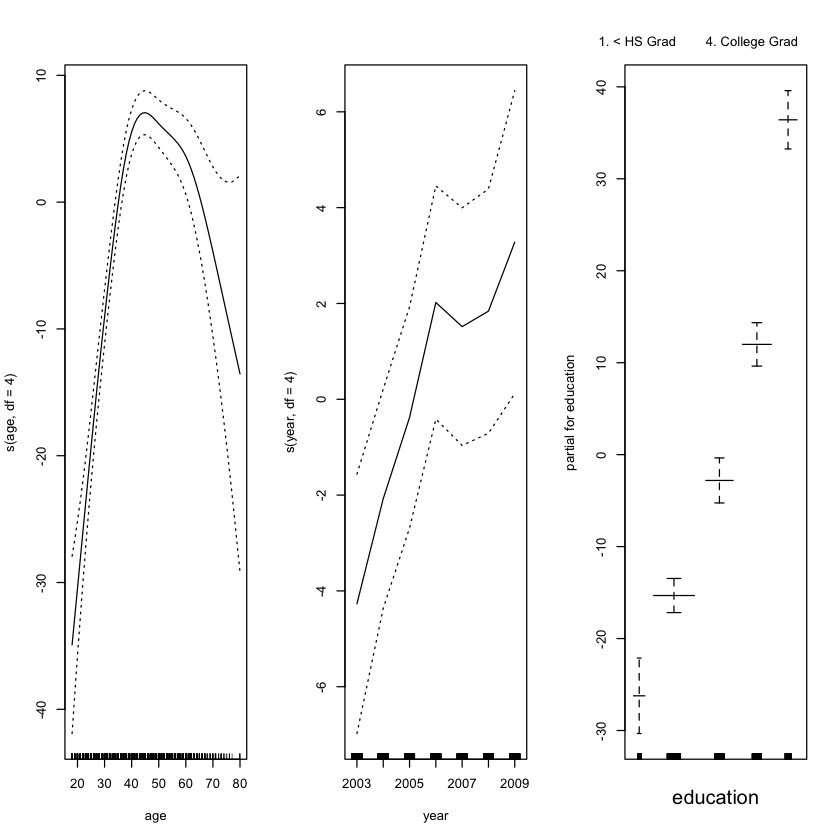

In [37]:
gam1 = gam(wage~s(age, df = 4) + s(year, df = 4) + education, data = Wage)
# s() means smoothing spline
# df = degrees of freedom = 4th polynomial
par(mfrow = c(1, 3))
plot(gam1, se = T)

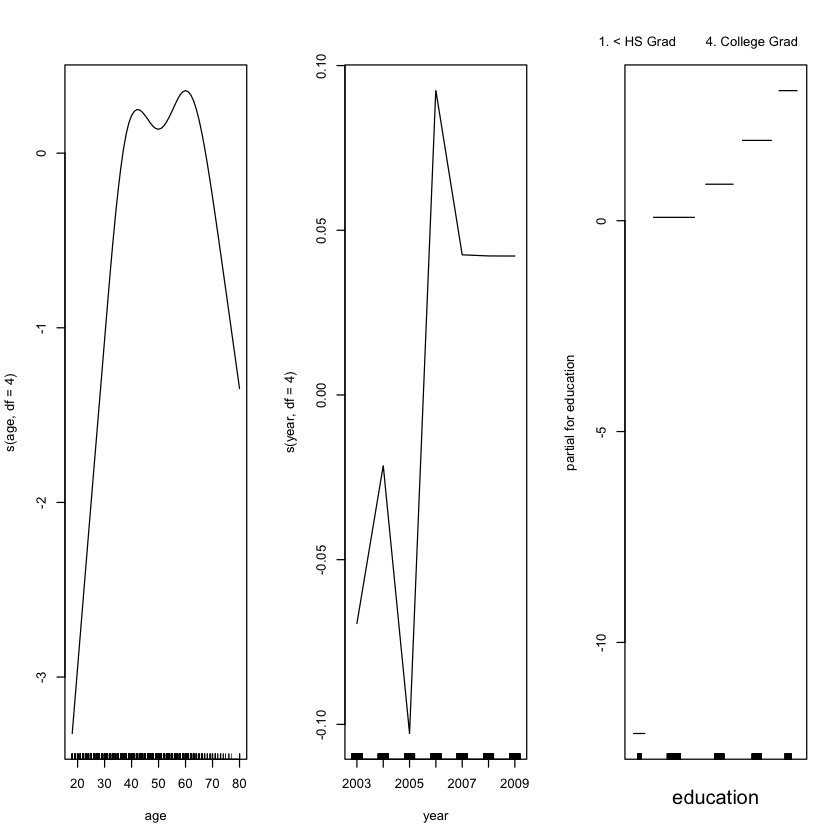

In [40]:
gam2 = gam(I(wage > 250)~ s(age, df = 4) + s(year, df = 4) + education,
          data = Wage, family = binomial)
par(mfrow = c(1, 3))
plot(gam2)

# this is only fore the super rich people

In [42]:
gam2a = gam(I(wage > 250)~s(age, df = 4) + year + education, 
            data = Wage, family = binomial)
# no df = 4on year.
anova(gam2a, gam2, test = "Chisq")
#Chi^2 is .82 so the df = 4 is unnecessary

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
1,2990,603.7774,NA,NA,NA
2,2987,602.8725,2.999983,0.9049826,0.8242229


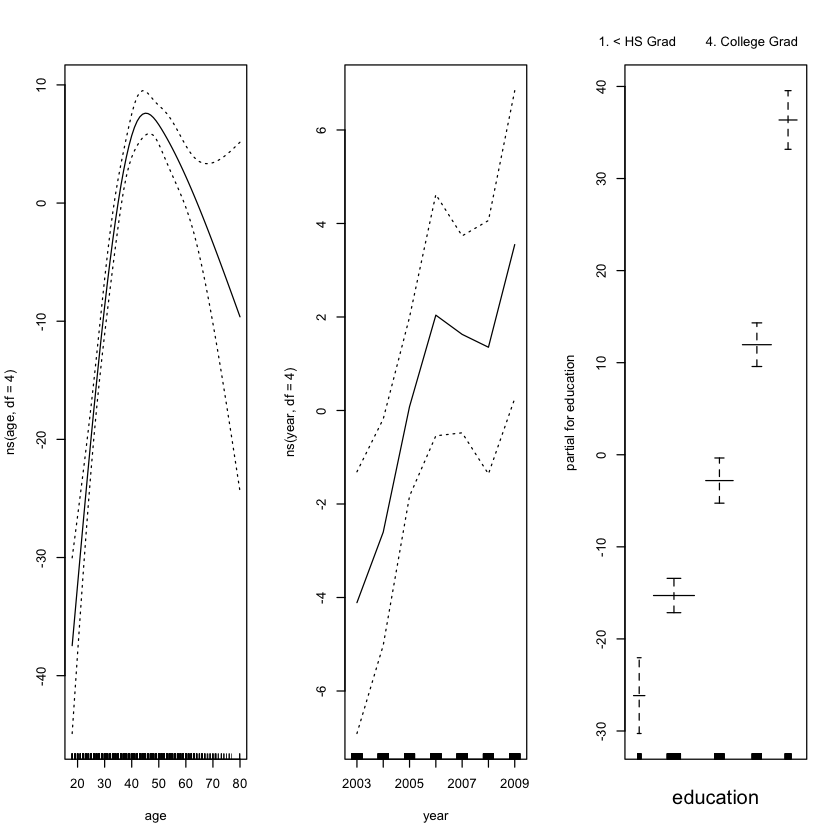

In [43]:
par(mfrow = c(1, 3))
lm1 = lm(wage ~ ns(age, df = 4) + ns(year, df = 4) + education, data = Wage)
# ns = natural spline
plot.gam(lm1, se = T)